# Deadlock Detection Using Topological Sorting

## Deadlock

###### Deadlock is a situation where a set of processes are blocked because each process is holding a resource and waiting for another resource acquired by some other process. 

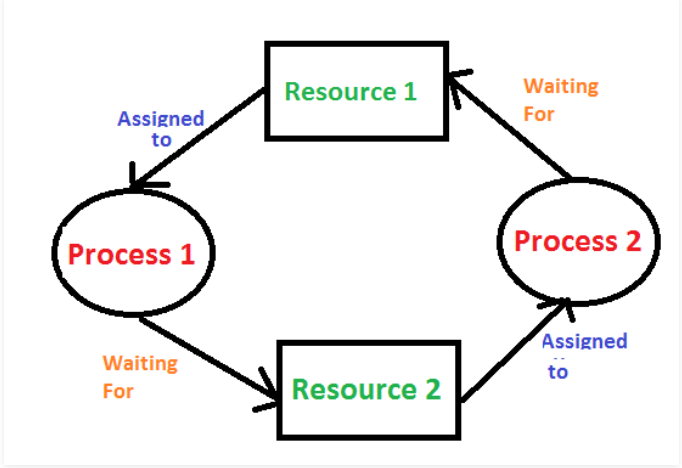


###### For example, in the below diagram, Process 1 is holding Resource 1 and waiting for resource 2 which is acquired by process 2, and process 2 is waiting for resource 1.


# Topological Sorting

###### Topological sorting for Directed Acyclic Graph (DAG) is a linear ordering of vertices such that for every directed edge u v, vertex u comes before v in the ordering. A topological ordering is possible if and only if the graph has no directed cycles, that is, if it is a directed acyclic graph (DAG). Any DAG has at least one topological ordering.

# Algorithm using Depth First Search


### Step 1: Create a temporary stack.
### Step 2: Recursively call topological sorting for all its adjacent vertices, then push it to the stack (when all adjacent vertices are on stack). Note this step is same as Depth First Search in a recursive way.
### Step 3: Atlast, print contents of stack.
### Note: A vertex is pushed to stack only when all of its adjacent vertices (and their adjacent vertices and so on) are already in stack.

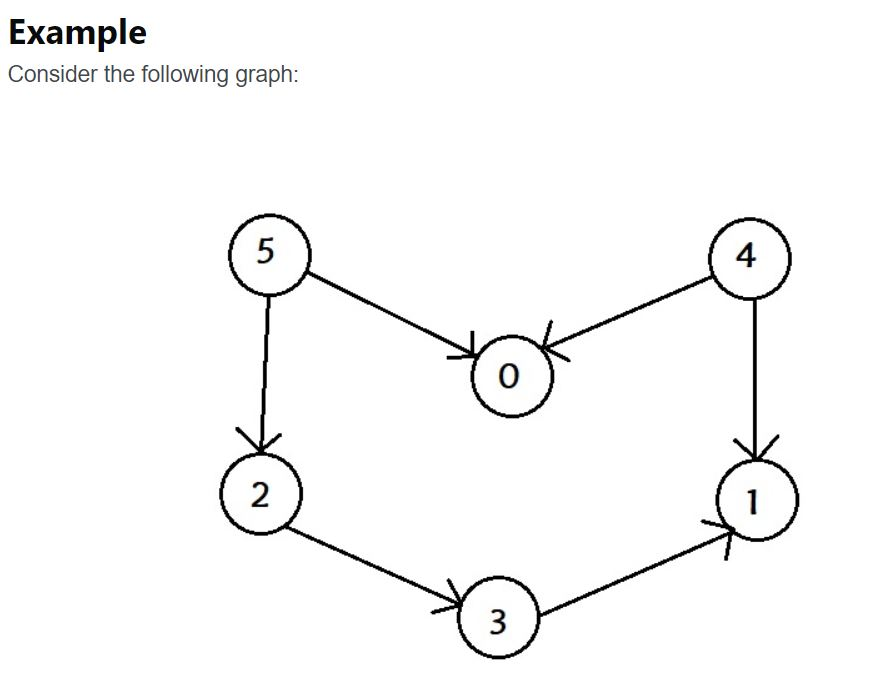

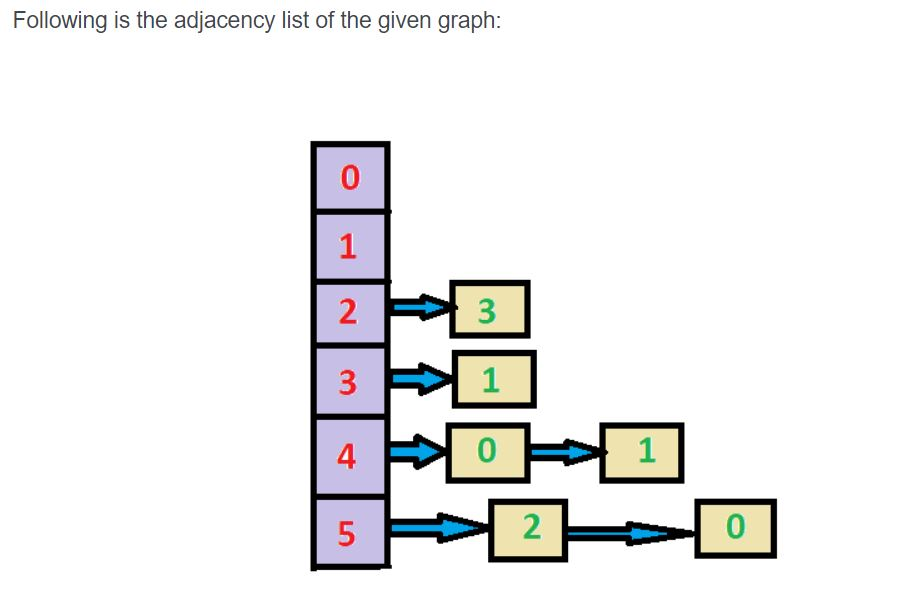

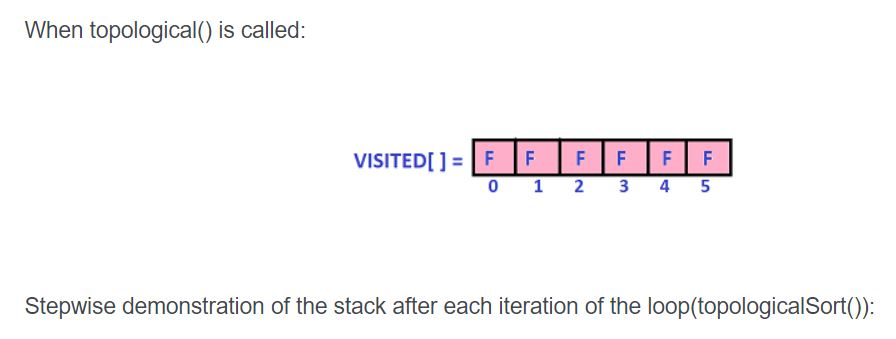

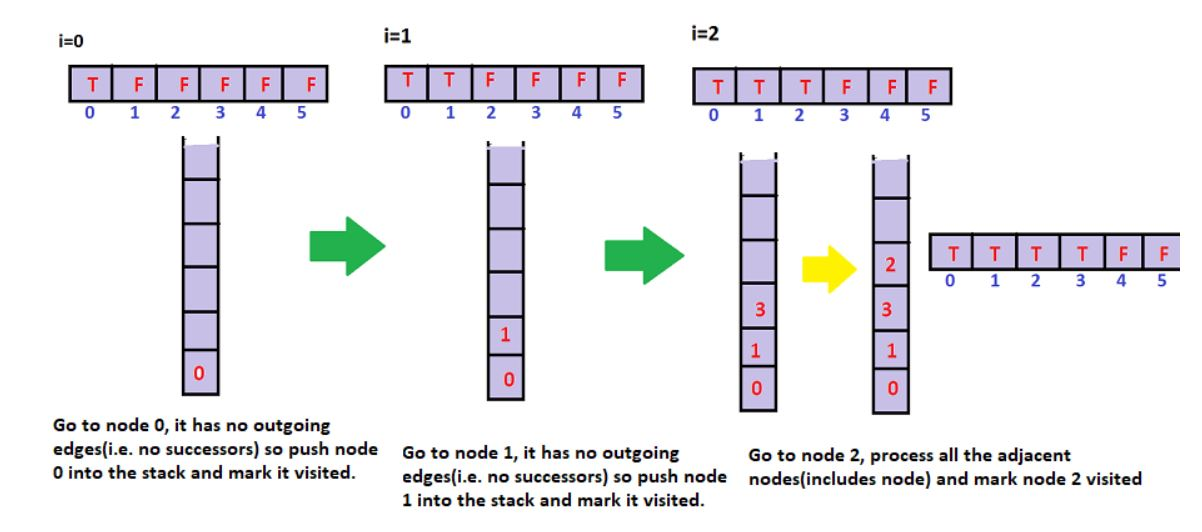

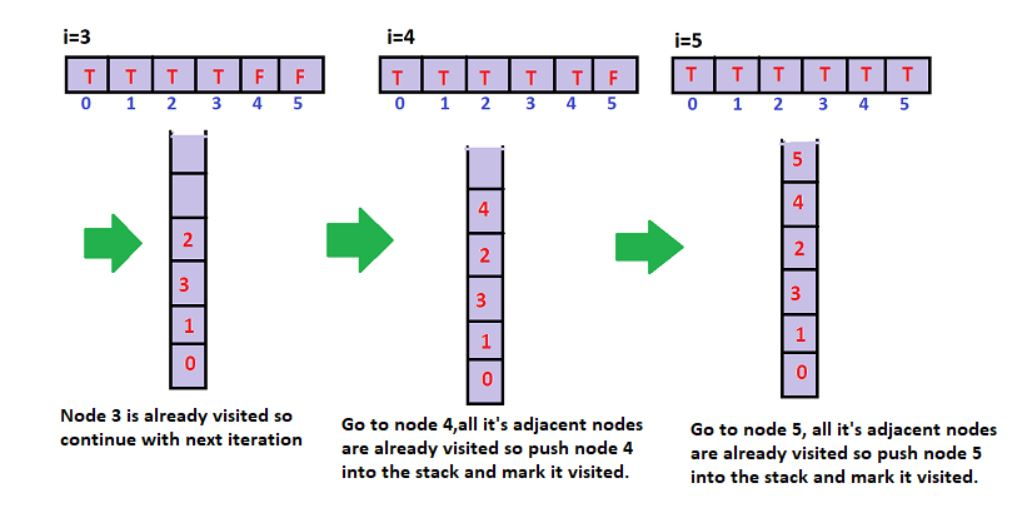

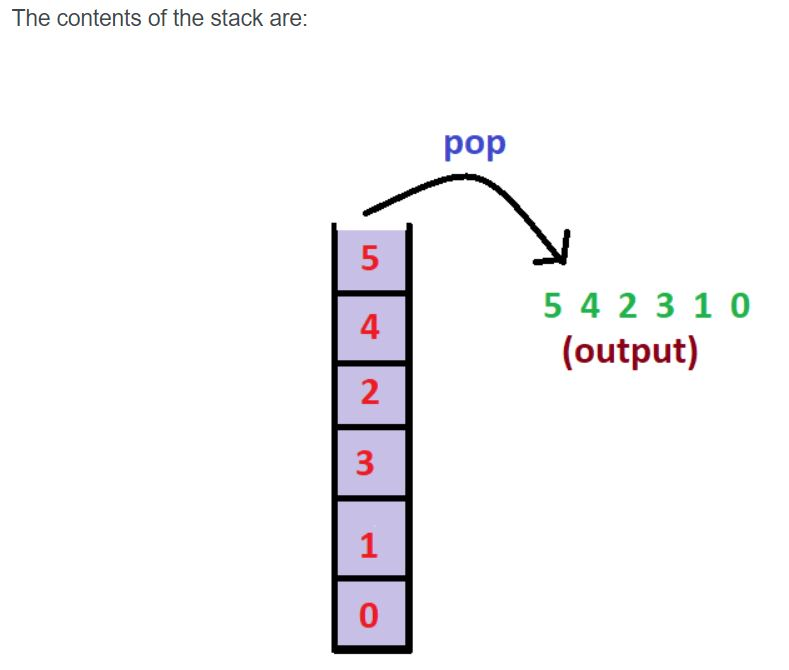

## Case 1: With Deadlock

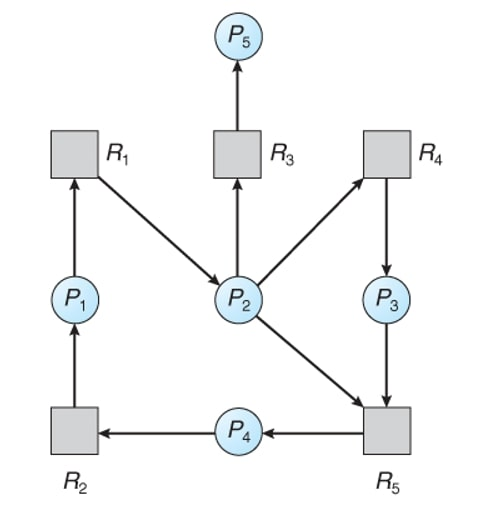

In [5]:
# Edges of the above resource allocation graph.
edges = [['0', 'r1'], ['1', 'r5'], ['1', 'r4'],
         ['1','r3'], ['2', 'r5'],['3','r2'],['r1','1'],['r2','0'],['r3','4'],['r4','2'],['r5','3']]

In [6]:
# Creating adjacency list inorder to get edges of wait for graph.
adj_list1 = {} # adjacency list.
mylist1 = []   # list of vertices.
def add_node(node):
    if node not in mylist1:     # If node not present in mylist1, then append it.
        mylist1.append(node)
    else:
        print("Node ",node," already exists!")
 

def add_edge(node1, node2):
    temp = []
    if node1 in mylist1 and node2 in mylist1:
        if node1 not in adj_list1:
            temp.append(node2)
            adj_list1[node1] = temp             # Creating adjacency list.
                                                # {'0':['r1'],...}
        elif node1 in adj_list1:
            temp.extend(adj_list1[node1])
            temp.append(node2)
            adj_list1[node1] = temp
       
    else:
        print("Nodes don't exist!")
 
def graph():
    for node in sorted(adj_list1.keys()):
        print(node, " ---> ", [i for i in adj_list1[node]])
 

add_node('0')
add_node('1')
add_node('2')
add_node('3')
add_node('4')
add_node('r2')
add_node('r1')
add_node('r3')
add_node('r4')
add_node('r5')


for j in edges: # edges is list of lists.
    add_edge(j[0], j[1])
 
 #Printing the adjacency list
print(f"Adjacency List: {adj_list1}")
print()
graph()

Adjacency List: {'0': ['r1'], '1': ['r5', 'r4', 'r3'], '2': ['r5'], '3': ['r2'], 'r1': ['1'], 'r2': ['0'], 'r3': ['4'], 'r4': ['2'], 'r5': ['3']}

0  --->  ['r1']
1  --->  ['r5', 'r4', 'r3']
2  --->  ['r5']
3  --->  ['r2']
r1  --->  ['1']
r2  --->  ['0']
r3  --->  ['4']
r4  --->  ['2']
r5  --->  ['3']


In [7]:
Edges=[]    # to store edges for Wait for graph.
for i in adj_list1:
    if(len(i)==1):    # process had length 1.
        list_of_resources = adj_list1[i]
        for k in list_of_resources:
            j=adj_list1[k][0]
            Edges.append((int(i),int(j)))     # 0 -> r1 and r1-> 1 so 0 -> 1

In [8]:
Edges

[(0, 1), (1, 3), (1, 2), (1, 4), (2, 3), (3, 0)]

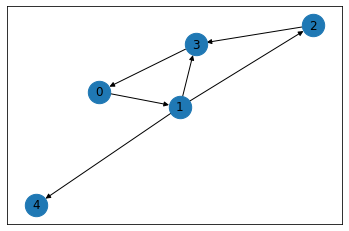

In [12]:
import networkx as nx             # Drawing wait for graph.
import matplotlib.pyplot as plt
G1 = nx.DiGraph()
G1.add_edges_from(Edges)
nx.draw_networkx(G1,node_size=500)

# Using DFS

In [25]:
# Stack to store the visited vertices in the Topological Sort.
s = []

# Store Topological Order
tsort = []

# Adjacency list to store edges
adj = [[] for i in range(5)]                                        # [[1], [3, 2, 4], [3], [0],[]] = adj

# To ensure visited vertex
visited = [False for i in range(5)]

# Function to perform DFS
def dfs(u):

    # Set the vertex as visited
    visited[u] = 1                            # Visisted=[1,1,1,1,1]                                 
    
    for it in adj[u]:                              # [[1], [3, 2, 4], [3], [0],[]] = adj           

        # Visit connected vertices
        if (visited[it] == 0):                 
            dfs(it)                              

    # Push into the stack on

    s.append(u)                                # s=[3,2,4,1,0]
    #print(u)   

# Function to check and return
# if a cycle exists or not


def check_cycle():

    # Stores the position of vertex in topological order.
    pos = dict()
    
    ind = 0
    
    # Pop all elements from stack
    while (len(s) != 0):           
        pos[s[-1]] = ind           # pos ={0:0,1:1,4:2,2:3,3:4}
                                                                            # s=[3,2,4,1,0]
        # Push element to get Topological Order.
        tsort.append(s[-1])          # tsort=[0,1,4,2,3]

        ind += 1

        # Pop from the stack
        s.pop()
    print(tsort)
    for i in range(n):        # Deadlock detection.
        for it in adj[i]:       # [[1], [3, 2, 4], [3], [0],[]] = adj
            first = 0 if i not in pos else pos[i]          # first  = 0,1,1,1,3,4
            second = 0 if it not in pos else pos[it]       # Second = 1,4,3,2,4,0

            # If parent vertex does not appear first.
            if (first > second):

# Cycle exists
                #print(i)
                return True

    # Return false if cycle
    # does not exist
    return False

# Function to add edges
# from u to v
def addEdge(u, v):

    adj[u].append(v)
    
# Driver Code
if __name__ == "__main__":

    n = 5
    

    # Insert edges

    for edge in Edges:        # Edges = [(1, 3), (1, 2), (1, 4), (2, 3), (3, 0)]
        addEdge(edge[0],edge[1])
    
    
    for i in range(n):
        if (visited[i] == False):
            dfs(i)

# If cycle exist
    if (check_cycle()):
        print('Deadlock Present')
    else:
        print('No Deadlock')

    #print(adj)
#Topological sort of directed graph is a linear ordering of its vertices such that, 
#for every directed edge U -> V from vertex U to vertex V, U comes before V in the ordering. 

[0, 1, 4, 2, 3]
Deadlock Present


## Case 2: Without Deadlock

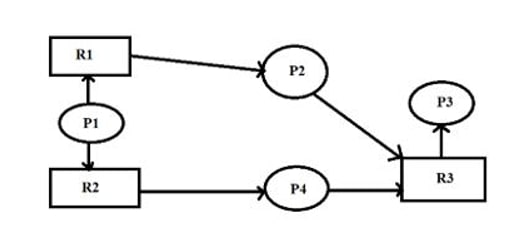

In [1]:
edges = [['0', 'r1'],['0', 'r2'], ['1', 'r3'], 
         ['3','r3'],['r1','1'],['r2','3'],['r3','2']]

In [2]:
# Stack to store the visited vertices in the Topological Sort.
adj_list1 = {}
mylist1 = []   # list of vertices.
def add_node(node):
    if node not in mylist1:
        mylist1.append(node)
    else:
        print("Node ",node," already exists!")
 

def add_edge(node1, node2):
    temp = []
    if node1 in mylist1 and node2 in mylist1:
        if node1 not in adj_list1:
            temp.append(node2)
            adj_list1[node1] = temp
   
        elif node1 in adj_list1:
            temp.extend(adj_list1[node1])
            temp.append(node2)
            adj_list1[node1] = temp
       
    else:
        print("Nodes don't exist!")
 
def graph():
    for node in sorted(adj_list1.keys()):
        print(node, " ---> ", [i for i in adj_list1[node]])
 

add_node('0')
add_node('1')
add_node('2')
add_node('3')

add_node('r2')
add_node('r1')
add_node('r3')



for j in edges:
    add_edge(j[0], j[1])
 
 #Printing the adjacency list
print(adj_list1)

{'0': ['r1', 'r2'], '1': ['r3'], '3': ['r3'], 'r1': ['1'], 'r2': ['3'], 'r3': ['2']}


In [28]:
Edges=[]    # Wait for graph
for i in adj_list1:
    if(len(i)==1):
        list_of_resources = adj_list1[i]
        for k in list_of_resources:
            j=adj_list1[k][0]
            Edges.append((int(i),int(j)))

In [29]:
Edges

[(0, 1), (0, 3), (1, 2), (3, 2)]

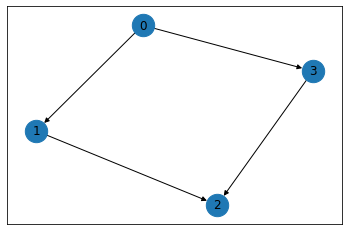

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
G1 = nx.DiGraph()
G1.add_edges_from(Edges)
nx.draw_networkx(G1,node_size=500)

In [32]:
# Stack to store the
# visited vertices in
# the Topological Sort
s = []

# Store Topological Order
tsort = []

# Adjacency list to store edges
adj = [[] for i in range(4)]                     # [[1, 3], [2], [], [2]] = adj

# To ensure visited vertex
visited = [False for i in range(4)]

# Function to perform DFS
def dfs(u):                                      # visited  = [1,1,1,1]
                                                # [[1, 3], [2], [], [2]] = adj
    # Set the vertex as visited
    visited[u] = 1
    
    for it in adj[u]:                                         

        # Visit connected vertices
        if (visited[it] == 0):
            dfs(it)                              

    # Push into the stack on

    s.append(u)                               # s=[2,1,3,0]
    #print(u)   

# Function to check and return
# if a cycle exists or not

def check_cycle():

    # Stores the position of
    # vertex in topological order
    pos = dict()
    
    ind = 0
    
    # Pop all elements from stack
    while (len(s) != 0):                       
        pos[s[-1]] = ind                    # s=[2,1,3,0]
                                              # pos = {0:0,3:1,1:2,2:3} 
        # Push element to get
        # Topological Order                    #tsort = [0,3,1,2]
        tsort.append(s[-1])

        ind += 1

        # Pop from the stack
        s.pop()
    print(tsort)
    for i in range(n):
        for it in adj[i]:                                       # [[1, 3], [2], [], [2]] = adj
            first = 0 if i not in pos else pos[i]               #first  = 0,0,2,1
            second = 0 if it not in pos else pos[it]            #second = 2,1,3,3

            # If parent vertex
# does not appear first
            if (first > second):

# Cycle exists
# print(i)
                return True

    # Return false if cycle
    # does not exist
    return False

# Function to add edges
# from u to v
def addEdge(u, v):

    adj[u].append(v)

# Driver Code
if __name__ == "__main__":

    n = 4


    # Insert edges

    for edge in Edges:
        addEdge(edge[0],edge[1])
    
    
    for i in range(n):
        if (visited[i] == False):
            dfs(i)

# If cycle exist
    if (check_cycle()):
        print('Deadlock Present')
    else:
        print('No deadlock')

#     print(adj)
#Topological sort of directed graph is a linear ordering of its vertices such that, 
#for every directed edge U -> V from vertex U to vertex V, U comes before V in the ordering. 

[0, 3, 1, 2]
No deadlock


# Algorithm using Breadth First Search

### Step1: Create an adjacency list called graph
### Step2: Call the topologicalsort() function
#### Step2.1: Create a queue and an array called indegree[]
#### Step2.2: Calculate the indegree of all vertices by traversing over graph
#### Step2.3: Enqueue all vertices with degree 0
### Step3: While the queue is not empty repeat the below steps
#### Step3.1: Dequeue the element at front from the queue and push it into the solution vector
#### Step3.2: Decrease the indegree of all the neighbouring vertex of currently dequed element ,if indegree of any neigbouring vertex becomes 0 enqueue it.
#### Step3.3: Enqueue all vertices with degree 0.
### Step4: If the queue becomes empty return the solution vector.
### Step5: Atlast after return from the topologicalsort() function, print contents of returned vector.

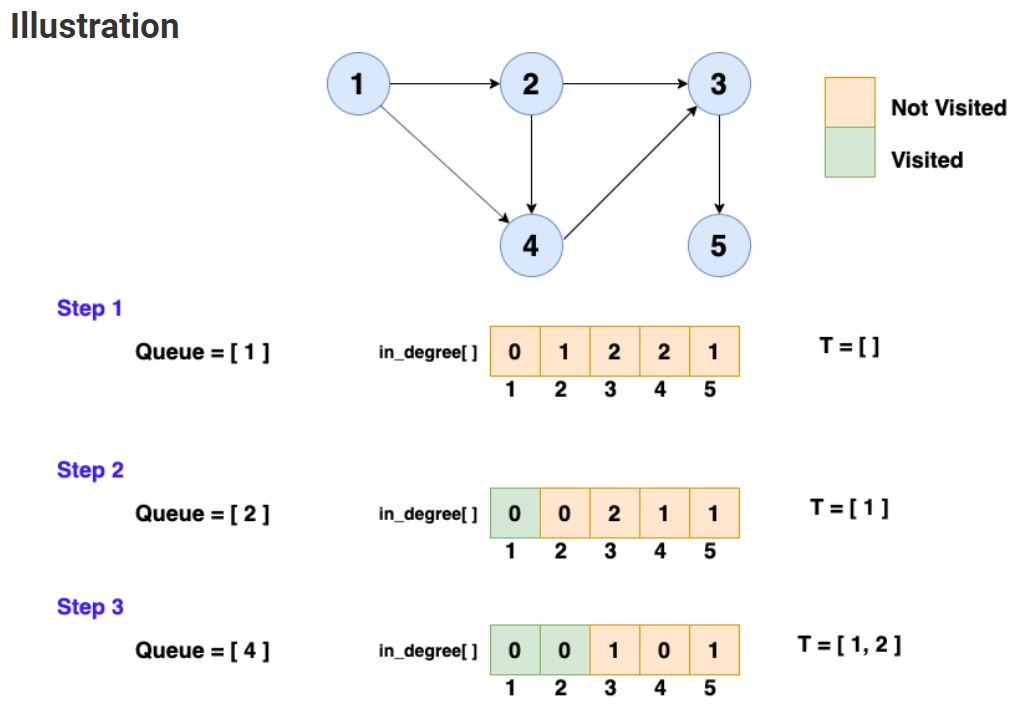

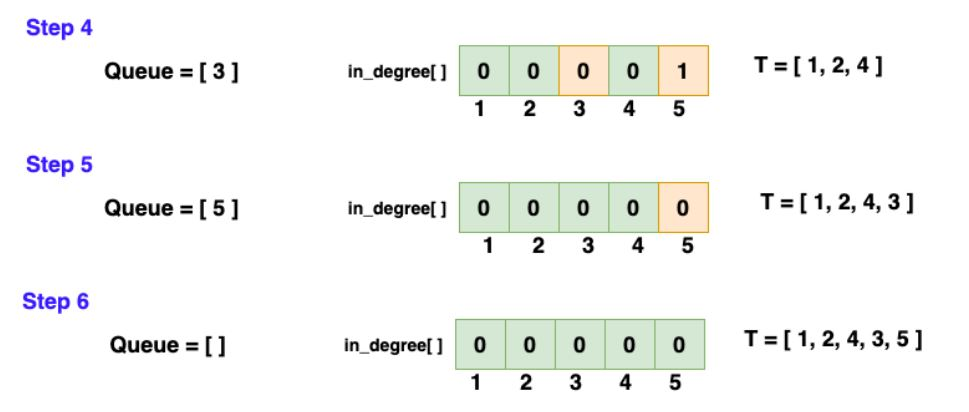

## Case1: With deadlock

In [41]:
Edges1 = [(0, 1), (1, 3), (1, 2), (1, 4), (2, 3), (3, 0)]

In [48]:
    # A Python program to print topological sorting of a graph using indegrees.
    from collections import defaultdict

    # Class to represent a graph
    class Graph:
        def __init__(self, vertices):
            self.graph = defaultdict(list) # dictionary containing adjacency List (Empty)
            self.V = vertices # No. of vertices = 5

        # function to add an edge to graph
        def addEdge(self, u, v):
            self.graph[u].append(v) #graph=defaultdict(<class 'list'>, {0: [1], 1: [3, 2, 4], 2: [3], 3: [0]}).


        # The function to do Topological Sort.
        def topologicalSort(self):

            # Create a vector to store indegrees of all
            # vertices. Initialize all indegrees as 0.
            in_degree = [0]*(self.V)       # in_degree = [0,0,0,0,0]

            # Traverse adjacency lists to fill indegrees of
            # vertices. This step takes O(V + E) time
            for i in self.graph:                  #graph=defaultdict(<class 'list'>, {0: [1], 1: [3, 2, 4], 2: [3], 3: [0]}).
                for j in self.graph[i]: 
                    in_degree[j] += 1         # in_degree = [1,1,1,2,1]
 # In a dag, there must be at least one vertex with no incoming edge, or a vertext with indegree 0.

            # Create an queue and enqueue all vertices with
            # indegree 0
            queue = []
            for i in range(self.V):
                if in_degree[i] == 0:      # in_degree = [1,1,1,2,1]
                    queue.append(i)        # Here Queue is empty as there is no node with in-degree zero.

            # Initialize count of visited vertices
            cnt = 0

            # Create a vector to store result (A topological
            # ordering of the vertices)
            top_order = []

            # One by one dequeue vertices from queue and enqueue
            # adjacents if indegree of adjacent becomes 0
            while queue: # False

                # Extract front of queue (or perform dequeue)
                # and add it to topological order
                u = queue.pop(0)
                top_order.append(u)

                # Iterate through all neighbouring nodes
                # of dequeued node u and decrease their in-degree
                # by 1
                for i in self.graph[u]:
                    in_degree[i] -= 1
                    # If in-degree becomes zero, add it to queue
                    if in_degree[i] == 0:
                        queue.append(i)

                cnt += 1

            # Check if there was a cycle
            if cnt != self.V:          # cnt = 0 itself
                print ("Deadlock present")      
            else :
                # Print topological order
                print (top_order)
                print("No deadlock found")           


    g = Graph(5)

    for edge in Edges1:
        g.addEdge(edge[0],edge[1])

    # print ("Following is a Topological Sort of the given graph")
    g.topologicalSort()
    print(g.graph)

Deadlock present
defaultdict(<class 'list'>, {0: [1], 1: [3, 2, 4], 2: [3], 3: [0]})


## Case2: Without deadlock

In [49]:
Edges1 = [(0, 1), (0, 3), (1, 2), (3, 2)]

In [52]:
    # A Python program to print topological sorting of a graph
    # using indegrees
    from collections import defaultdict

    # Class to represent a graph
    class Graph:
        def __init__(self, vertices):
            self.graph = defaultdict(list) # dictionary containing adjacency List
            self.V = vertices # No. of vertices = 4.
                                      
        # function to add an edge to graph
        def addEdge(self, u, v):
            self.graph[u].append(v)    # graph = defaultdict(<class 'list'>, {0: [1, 3], 1: [2], 3: [2], 2: []})


        # The function to do Topological Sort.
        def topologicalSort(self):

            # Create a vector to store indegrees of all
            # vertices. Initialize all indegrees as 0.
            in_degree = [0]*(self.V)                          # in_degree = [0,0,0,0]

            # Traverse adjacency lists to fill indegrees of
            # vertices. This step takes O(V + E) time
            for i in self.graph:    # graph = defaultdict(<class 'list'>, {0: [1, 3], 1: [2], 3: [2], 2: []})
                for j in self.graph[i]:                        
                    in_degree[j] += 1                          # in_degree = [0,1,2,1]
# In a dag, there must be at least one vertex with no incoming edge, or a vertext with indegree 0.
            # Create an queue and enqueue all vertices with
            # indegree 0
            queue = []
            for i in range(self.V):
                if in_degree[i] == 0:               # in_degree = [0,1,2,1]
                    queue.append(i)                 # queue = [0]

            # Initialize count of visited vertices
            cnt = 0

            # Create a vector to store result (A topological
            # ordering of the vertices)
            top_order = []

            # One by one dequeue vertices from queue and enqueue
            # adjacents if indegree of adjacent becomes 0
            while queue:

                # Extract front of queue (or perform dequeue)
                # and add it to topological order
                u = queue.pop(0)               # u = 0,1,3,2
                top_order.append(u)          # top_order = [0,1,3,2]

                # Iterate through all neighbouring nodes
                # of dequeued node u and decrease their in-degree
                # by 1
                for i in self.graph[u]: # graph = defaultdict(<class 'list'>, {0: [1, 3], 1: [2], 3: [2], 2: []})
                    in_degree[i] -= 1     # in_degree = [0,0,0,0]
                    # If in-degree becomes zero, add it to queue
                    if in_degree[i] == 0:
                        queue.append(i)         # queue = []

                cnt += 1                   # cnt = 4

            # Check if there was a cycle
            if cnt != self.V:
                print ("Deadlock present")
            else :
                # Print topological order
                print (top_order)
                print("No deadlock found")           


    g = Graph(4)

    for edge in Edges1:
        g.addEdge(edge[0],edge[1])

    # print ("Following is a Topological Sort of the given graph")
    g.topologicalSort()
    print(g.graph)

[0, 1, 3, 2]
No deadlock found
defaultdict(<class 'list'>, {0: [1, 3], 1: [2], 3: [2], 2: []})


# Comparison of BFS and DFS for Topological sort.

#### DFS is typically implemented with LIFO (a stack) - last in first out.

#### BFS typically implemented with FIFO (a queue) - first in first out.

#### You can walk a graph in any way you want, and eventually come out with a topological order of its nodes. But if you want to do it efficiently, then DFS is the best option, as the topological order of the nodes essentially reflects their depth in the graph.

#### Time Complexity of DFS / BFS to search all vertices = O(E + V) ; E = Edges, V = Vertices

#### Reason: O(1) for all nodes, O(1) for all edges, because in both the cases, DFS and BFS, we are going to traverse each edge only once and also each vertex only once since you don’t visit an already visited node.

#### A DFS will only store as much memory on the stack as is required for the longest root to leaf path in the tree. In other words, it space usage is  O(h) where  h is the height of the tree. A BFS on the other hand will queue every node at a fixed depth before visiting the next depth. 

#### In these cases  h = O(log n) < O(n) and DFS will therefore use less memory. So DFS is more memory efficient than BFS.

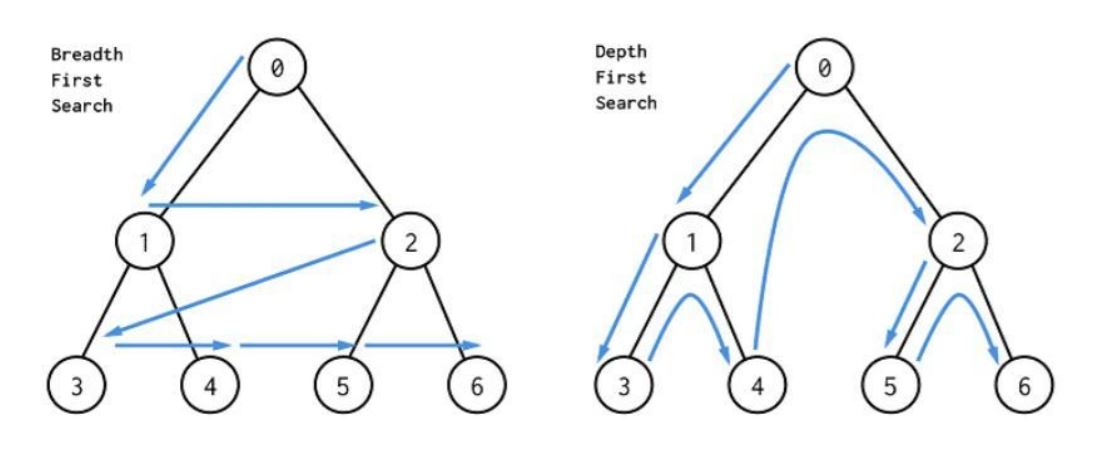